In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [52]:
# Load datasets
customers = pd.read_csv("./Customers.csv")
products = pd.read_csv("./Products.csv")
transactions = pd.read_csv("./Transactions.csv")

In [53]:
# Preview datasets
print("Customers:\n", customers.head())
print('\n')
print("Products:\n", products.head())
print('\n')
print("Transactions:\n", transactions.head())
print('\n')

Customers:
   CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


Products:
   ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


Transactions:
   TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067 

In [54]:
print("Customers shape: ", customers.shape)
print("Products shape: ", products.shape)
print("Transactions shape: ", transactions.shape)

Customers shape:  (200, 4)
Products shape:  (100, 4)
Transactions shape:  (1000, 7)


In [55]:
print('Customers info:')
customers.info()

Customers info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [56]:
print('Products info:')
products.info()

Products info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [57]:
print('Transactions info:')
print(transactions.info())

Transactions info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [58]:
# Checking for null values
print('Customers null values:\n', customers.isnull().sum())
print('\n')
print('Products null values:\n', products.isnull().sum())
print('\n')
print('Transactions null values:\n', transactions.isnull().sum())
print('\n')

Customers null values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


Products null values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


Transactions null values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64




In [59]:
# Checking for duplicates
print('Customers duplicates:', customers.duplicated().sum())
print('Products duplicates:', products.duplicated().sum())
print('Transactions duplicates:', transactions.duplicated().sum())

Customers duplicates: 0
Products duplicates: 0
Transactions duplicates: 0


In [60]:
# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [61]:
# Merge data for analysis
merged_data = transactions.merge(customers, on="CustomerID").merge(
    products.rename(columns={"Price": "ProductPrice"}), on="ProductID"
)

In [62]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate,ProductName,Category,ProductPrice
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [63]:
# Additional Columns for Analysis
merged_data['Year'] = merged_data['TransactionDate'].dt.year
merged_data['Month'] = merged_data['TransactionDate'].dt.month_name()
merged_data['DayOfWeek'] = merged_data['TransactionDate'].dt.day_name()

In [64]:
# Top-selling products
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False)
print("\nTop 5 Selling Products:\n", top_products.head())


Top 5 Selling Products:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


In [65]:
# Revenue by region
region_revenue = merged_data.groupby("Region")["TotalValue"].sum()
print("\nRevenue by Region:\n", region_revenue)


Revenue by Region:
 Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


In [66]:
# Top customers by spending
top_customers = merged_data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False)
print("\nTop 5 Customers by Spending:\n", top_customers.head())


Top 5 Customers by Spending:
 CustomerName
Paul Parsons     10673.87
Bruce Rhodes      8040.39
Gerald Hines      7663.70
William Adams     7634.45
Aimee Taylor      7572.91
Name: TotalValue, dtype: float64


In [67]:
# Most active days
active_days = merged_data['DayOfWeek'].value_counts()
print("\nMost Active Days for Transactions:\n", active_days)


Most Active Days for Transactions:
 DayOfWeek
Tuesday      163
Wednesday    158
Thursday     150
Monday       139
Sunday       139
Saturday     126
Friday       125
Name: count, dtype: int64


In [68]:
# Monthly revenue trends
monthly_revenue = merged_data.groupby(["Year", "Month"])["TotalValue"].sum().reset_index()
monthly_revenue['Month'] = pd.Categorical(monthly_revenue['Month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
monthly_revenue = monthly_revenue.sort_values(["Year", "Month"])
monthly_revenue

,Year,Month,TotalValue
0,2023,December,3769.52
5,2024,January,66376.39
4,2024,February,51459.27
8,2024,March,47828.73
1,2024,April,57519.06
9,2024,May,64527.74
7,2024,June,48771.18
6,2024,July,71366.39
2,2024,August,63436.74
12,2024,September,70603.75


In [69]:
# Average product price by category
avg_price_by_category = merged_data.groupby("Category")["Price"].mean()
print("\nAverage Price by Product Category:\n", avg_price_by_category)


Average Price by Product Category:
 Category
Books          280.526222
Clothing       283.104254
Electronics    288.722008
Home Decor     237.616250
Name: Price, dtype: float64


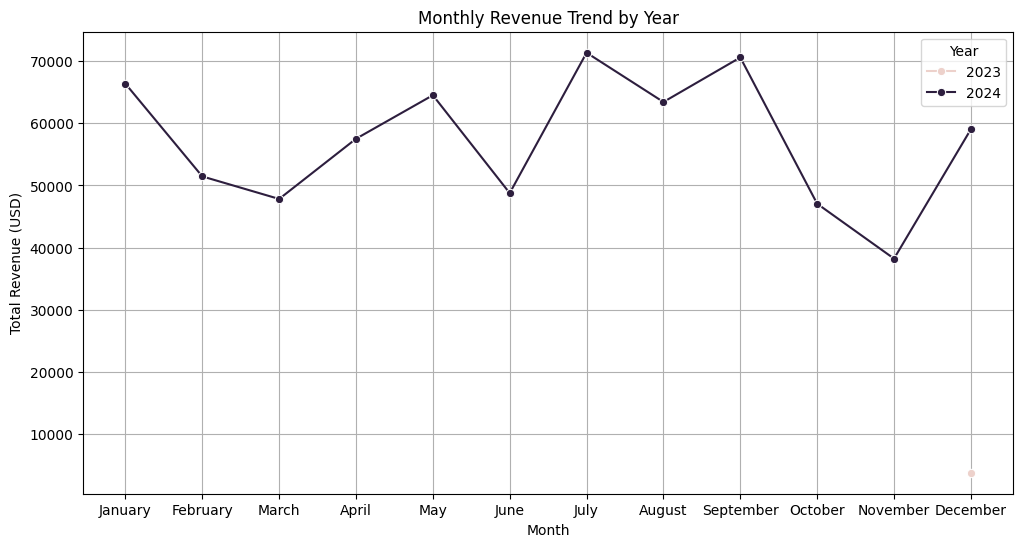

In [70]:
# Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_revenue, x="Month", y="TotalValue", hue="Year", marker="o")
plt.title("Monthly Revenue Trend by Year")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.legend(title="Year")
plt.grid()
plt.show()

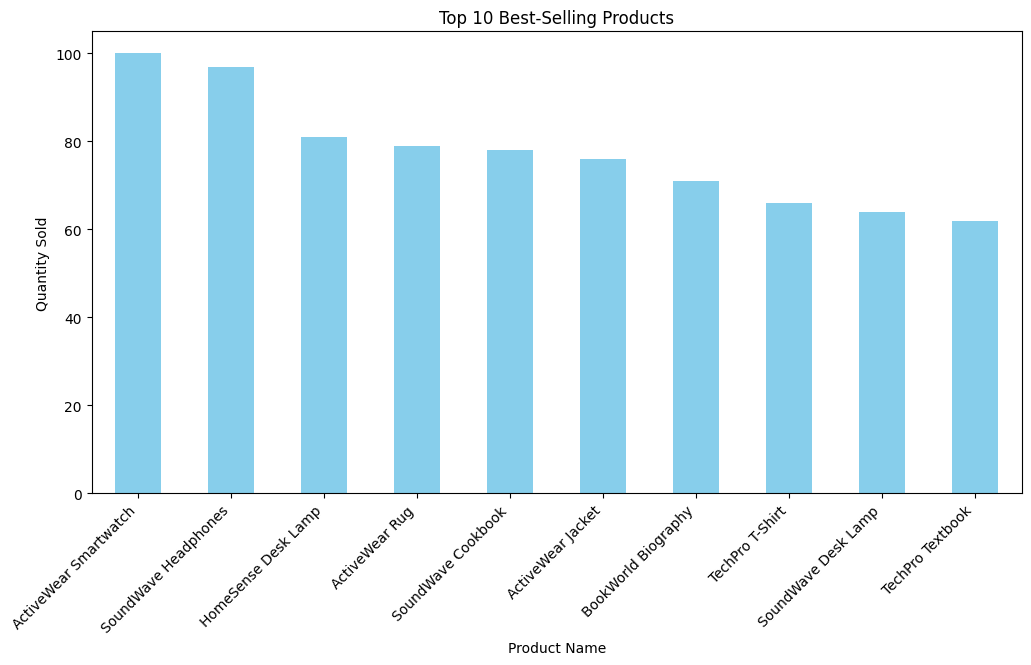

In [71]:
# Top Products
plt.figure(figsize=(12, 6))
top_products.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45, ha='right')
plt.show()

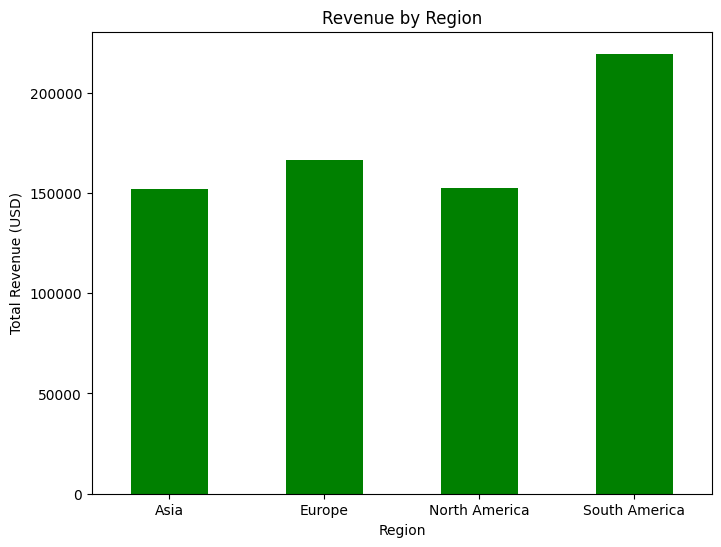

In [72]:
# Revenue by Region
plt.figure(figsize=(8, 6))
region_revenue.plot(kind='bar', color='green')
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=0)
plt.show()

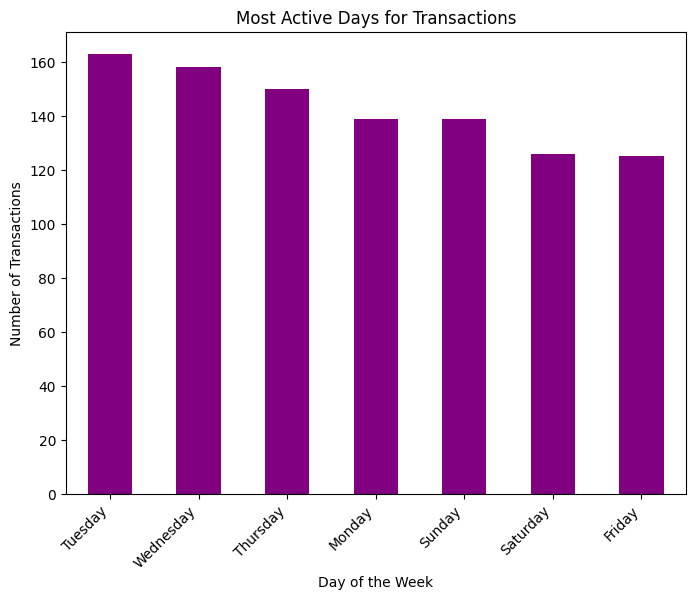

In [73]:
# Most Active Days for Transactions
plt.figure(figsize=(8, 6))
active_days.plot(kind='bar', color='purple')
plt.title("Most Active Days for Transactions")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45, ha='right')
plt.show()

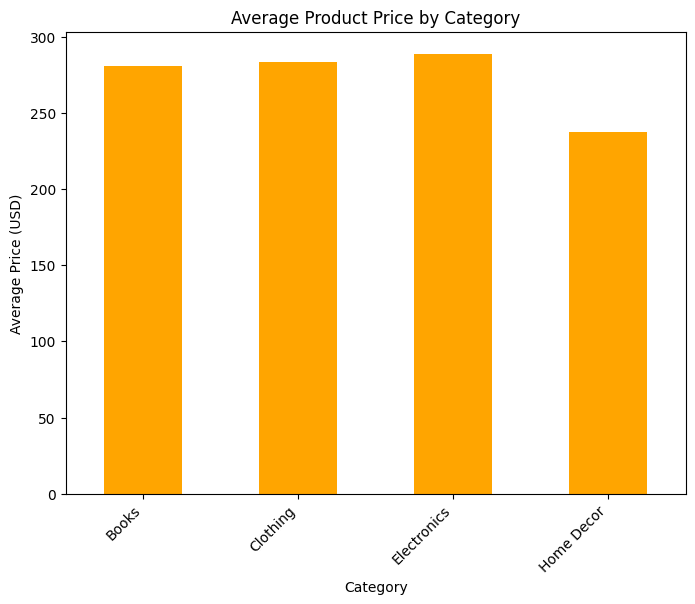

In [74]:
# Average Product Price by Category
plt.figure(figsize=(8, 6))
avg_price_by_category.plot(kind='bar', color='orange')
plt.title("Average Product Price by Category")
plt.xlabel("Category")
plt.ylabel("Average Price (USD)")
plt.xticks(rotation=45, ha='right')
plt.show()

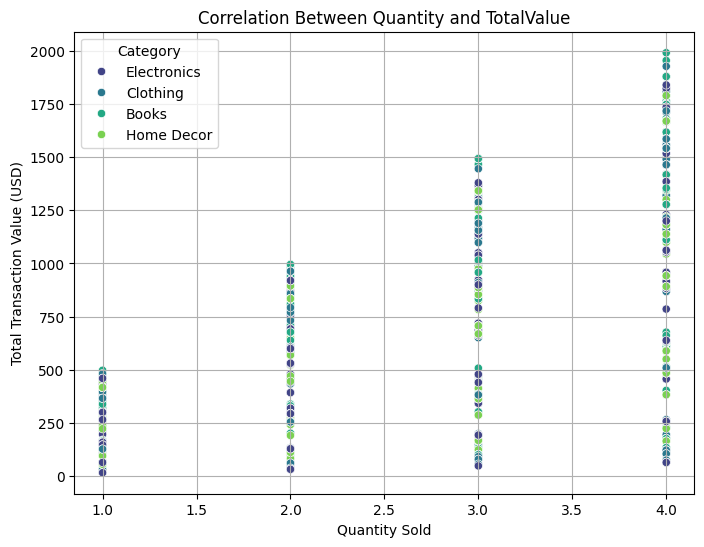

In [75]:
# Correlation between Quantity and TotalValue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x="Quantity", y="TotalValue", hue="Category", palette="viridis")
plt.title("Correlation Between Quantity and TotalValue")
plt.xlabel("Quantity Sold")
plt.ylabel("Total Transaction Value (USD)")
plt.grid()
plt.show()